## Problem Statement: 
### We are trying to classify customers as those who will churn or not

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

### Data Acquisation
##### Data was aquired from kaggle = ' https://www.kaggle.com/datasets/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [2]:
df = pd.read_csv('customer_churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.shape

(7043, 21)

In [5]:
# make the indexes of the column names uniform
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [6]:
# make the string values of rows uniform
strings = list(df.select_dtypes('object'))
strings

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [7]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [8]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [9]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [10]:
# we can see totalcharges is object type instead of numeric type
df.totalcharges.dtype

dtype('O')

In [11]:
#change totalcharges to numeric type,ignore all non-digit characters
df.totalcharges  = pd.to_numeric(df.totalcharges, errors='coerce')

In [12]:
#check for null values in tc
df.totalcharges.isnull().sum()

11

In [13]:
#fill the null values with 0
df.totalcharges = df.totalcharges.fillna(0)
df.totalcharges.isnull().sum()

0

In [14]:
#check the churn column 
#yes indicates customers who've churned and no who haven't
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [15]:
#turn the churn values into numeric values
df.churn = (df.churn == 'yes').astype(int)

In [16]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

### Set up Validation Framework
#### use scikit-learn library

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# 60% for training, 20% for validation and 20% for testing
#df is split into 80% for training and 20% for testing 
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [19]:
len(df_full_train), len(df_test)

(5634, 1409)

In [20]:
#split df_full_train into df_val(validation data)
#test size =0.25 because the df_full_train df is 80% of the original df
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)

In [21]:
len(df), len(df_train), len(df_test), len(df_val)

(7043, 4225, 1409, 1409)

In [22]:
#reset the indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
#split the churn column from the rest of the dataframe
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [24]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

### Perform EDA(Exploratory Data Analysis)

In [25]:
#check for missing values
df_full_train = df_full_train.reset_index(drop=True)

In [26]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [27]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [28]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [29]:
#find the churn rate(just find the mean of the df_full_train column)
global_churn_rate = df_full_train.churn.mean().round(2)

In [30]:
global_churn_rate

0.27

In [31]:
#separate the numerical columns from the categorical ones(the senior citizen is considered categorical)
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [32]:
numerical = ['tenure','monthlycharges','totalcharges']

In [33]:
categorical = [ 'gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [34]:
#check the number of unique values for the categorical columns

In [35]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### Feature Importance: Churn Rate and Risk ratio 
##### identifying features that have higher effect on the target value
##### Churn Rate
##### Risk Ration
##### Mutual information

#### Churn Rate
##### if the global_churn_rate - group_churn_rate > 0 -> the group(feature) is less likely to churn (global_churn_rate > group_churn_rate)
##### if the global_churn_rate - group_churn_rate < 0 -> the group(feature) is more likely to churn (global_churn_rate < group_churn_rate)

In [36]:
#churn rate by gender
female_churn_rate = df_full_train[df_full_train['gender'] == 'female'].churn.mean()
female_churn_rate.round(2)

0.28

In [37]:
male_churn_rate = df_full_train[df_full_train['gender'] == 'male'].churn.mean()
male_churn_rate.round(2)

0.26

In [38]:
global_churn_rate - female_churn_rate

-0.006824034334763918

In [39]:
global_churn_rate - male_churn_rate

0.006786469344608914

In [40]:
#churn rate of partners
partner_churn_rate = df_full_train[df_full_train['partner'] == 'yes'].churn.mean().round(2)
partner_churn_rate

0.21

In [41]:
no_partner_churn_rate = df_full_train[df_full_train['partner'] == 'no'].churn.mean().round(2)
no_partner_churn_rate

0.33

In [42]:
global_churn_rate - partner_churn_rate

0.060000000000000026

In [43]:
global_churn_rate - no_partner_churn_rate

-0.06

##### The partner feature has more effect on the target value(churn rate) while the gender feature doesn't affect the churn rate

#### Risk Ratio
##### if the group_churn_rate / global_churn_rate > 1 -> the group(feature) is more likely to churn 
##### if the  group_churn_rate / global_churn_rate < 1 -> the group(feature) is less likely to churn 

In [44]:
#id
no_partner_churn_rate / global_churn_rate

1.222222222222222

In [45]:
partner_churn_rate / global_churn_rate

0.7777777777777777

In [46]:
#to display the new dataframe
from IPython.display import display

In [47]:
#create a new dataframe to perform churn rate and risk ratio for the categorical columns
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = global_churn_rate - df_group['mean']
    df_group['rik'] =  df_group['mean'] / global_churn_rate 
    display(df_group)
    print()
    print()

gender


,mean,count,diff,rik
gender,,,,
female,0.276824,2796,-0.006824,1.025274
male,0.263214,2838,0.006786,0.974865




seniorcitizen


,mean,count,diff,rik
seniorcitizen,,,,
0,0.242270,4722,0.027730,0.897297
1,0.413377,912,-0.143377,1.531027




partner


,mean,count,diff,rik
partner,,,,
no,0.329809,2932,-0.059809,1.221515
yes,0.205033,2702,0.064967,0.759383




dependents


,mean,count,diff,rik
dependents,,,,
no,0.313760,3968,-0.043760,1.162074
yes,0.165666,1666,0.104334,0.613579




phoneservice


,mean,count,diff,rik
phoneservice,,,,
no,0.241316,547,0.028684,0.893764
yes,0.273049,5087,-0.003049,1.011292




multiplelines


,mean,count,diff,rik
multiplelines,,,,
no,0.257407,2700,0.012593,0.953361
no_phone_service,0.241316,547,0.028684,0.893764
yes,0.290742,2387,-0.020742,1.076820




internetservice


,mean,count,diff,rik
internetservice,,,,
dsl,0.192347,1934,0.077653,0.712398
fiber_optic,0.425171,2479,-0.155171,1.574709
no,0.077805,1221,0.192195,0.288167




onlinesecurity


,mean,count,diff,rik
onlinesecurity,,,,
no,0.420921,2801,-0.150921,1.558967
no_internet_service,0.077805,1221,0.192195,0.288167
yes,0.153226,1612,0.116774,0.567503




onlinebackup


,mean,count,diff,rik
onlinebackup,,,,
no,0.404323,2498,-0.134323,1.497494
no_internet_service,0.077805,1221,0.192195,0.288167
yes,0.217232,1915,0.052768,0.804564




deviceprotection


,mean,count,diff,rik
deviceprotection,,,,
no,0.395875,2473,-0.125875,1.466205
no_internet_service,0.077805,1221,0.192195,0.288167
yes,0.230412,1940,0.039588,0.853379




techsupport


,mean,count,diff,rik
techsupport,,,,
no,0.418914,2781,-0.148914,1.551534
no_internet_service,0.077805,1221,0.192195,0.288167
yes,0.159926,1632,0.110074,0.592320




streamingtv


,mean,count,diff,rik
streamingtv,,,,
no,0.342832,2246,-0.072832,1.269747
no_internet_service,0.077805,1221,0.192195,0.288167
yes,0.302723,2167,-0.032723,1.121195




streamingmovies


,mean,count,diff,rik
streamingmovies,,,,
no,0.338906,2213,-0.068906,1.255209
no_internet_service,0.077805,1221,0.192195,0.288167
yes,0.307273,2200,-0.037273,1.138047




contract


,mean,count,diff,rik
contract,,,,
month-to-month,0.431701,3104,-0.161701,1.598893
one_year,0.120573,1186,0.149427,0.446568
two_year,0.028274,1344,0.241726,0.104718




paperlessbilling


,mean,count,diff,rik
paperlessbilling,,,,
no,0.172071,2313,0.097929,0.637300
yes,0.338151,3321,-0.068151,1.252412




paymentmethod


,mean,count,diff,rik
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,0.101829,0.622854
credit_card_(automatic),0.164339,1217,0.105661,0.608661
electronic_check,0.455890,1893,-0.185890,1.688482
mailed_check,0.193870,1305,0.076130,0.718036


### Feature Importance: Mutual information

In [48]:
from sklearn.metrics import mutual_info_score

In [49]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [50]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [51]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [52]:
def mutual_info_churn_rate(series):
    return mutual_info_score(series, df_full_train.churn)

In [53]:
mutual_info = df_full_train[categorical].apply(mutual_info_churn_rate)
mutual_info.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### Feature Importance: Correlation 
##### Correlation coefficient for numerical categories
##### For a correlation coefficient r:
##### 0.0 <= r <= 0.1 -> low(rare) positive correlation 
##### -0.0 <= r <= -0.1 -> low(rare) negative correlation

##### 0.2 <= r <= 0.5 -> moderate(ocassional) positive correlation 
##### -0.2 <= r <= -0.5 -> moderate(ocassional) negative correlation 

##### 0.6 <= r <= 1.0 -> strong (often) positive correlation 
##### -0.6 <= r <= -1.0 -> strong (often) negative correlation

In [54]:
#correlation matrix 
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [55]:
#simple function to evaluate correlation coefficient for the above features
def churn_rate_eval(series, op ,val):
    return df_full_train[op(series, val)].churn.mean()

In [56]:
import operator

In [57]:
#churn rate of users who've subscribed for 2 months or lower
churn_rate_eval(df_full_train.tenure, operator.le, 2)

0.5953420669577875

In [58]:
#churn rate of users who've subscribed more than 2 months
churn_rate_eval(df_full_train.tenure, operator.gt, 2)

0.22478269658378816

In [59]:
#churn rate of users who've been subscribed between 2 months and 12 months
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [60]:
#churn rate of users who've subscribed for more than 12 months
churn_rate_eval(df_full_train.tenure, operator.gt, 12)

0.17634908339788277

In [61]:
#churn rate for the monthlycharges for less than or equal to 20
churn_rate_eval(df_full_train.monthlycharges, operator.le, 20)

0.08795411089866156

In [62]:
#churn rate for the monthlycharges between 20 and 50
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [63]:
#churn rate for the monthlycharges for greater than 50
churn_rate_eval(df_full_train.monthlycharges, operator.gt, 50)

0.32499341585462205

### One-Hot Encoding

In [64]:
#import DictVectorizer(used for One-Hot encoding)from scikit-learn
from sklearn.feature_extraction import DictVectorizer

In [65]:
#turn categorical and numerical varaibles into dicts
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')

In [66]:
#avoid creating sparse matrix
dv = DictVectorizer(sparse= False)

In [67]:
# convert the dicts into vector format
X_train = dv.fit_transform(train_dicts)
X_train.shape

(4225, 45)

In [68]:
#we can use fit_transform() to minimize steps
#X_train = dv.fit_trasform(train_dicts)

In [69]:
#for validation data 
val_dict = df_val[categorical + numerical].to_dict(orient = 'records')

In [70]:
X_val = dv.fit_transform(val_dict)

### Logistic Regression
##### Binary Classification
##### Multiclass Classification
##### Formula for Logistic Regression:
###### g(Xi) = 1 / 1 + e ^ -z
###### z = W0 + Wi(Xi) -> which is the linear model formula

In [71]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [72]:
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [73]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

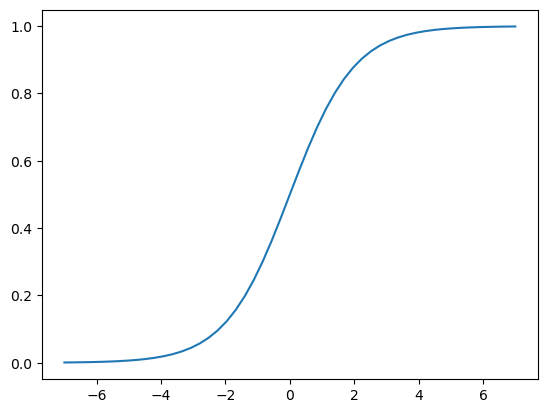

In [74]:
plt.plot(z, sigmoid(z))

In [75]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] + w[j]
        
    result = sigmoid(score)
    return result

### Training Logistic Regression with Scikit-learn


In [80]:
from sklearn.linear_model import LogisticRegression

In [82]:
model = LogisticRegression(max_iter = 400)

In [83]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [84]:
model.intercept_[0]

-0.125782482616802

In [85]:
model.coef_[0].round(3)

array([ 0.586, -0.121, -0.588, -0.029, -0.094,  0.056, -0.104, -0.075,
       -0.041, -0.082, -0.377,  0.358, -0.104,  0.003, -0.258,  0.155,
       -0.02 ,  0.057, -0.104, -0.075,  0.232, -0.104, -0.251, -0.243,
        0.121, -0.129,  0.006, -0.099, -0.036,  0.046, -0.033,  0.155,
       -0.278,  0.215, -0.108, -0.104,  0.089, -0.064, -0.104,  0.046,
        0.176, -0.104, -0.195, -0.066,  0.   ])

In [86]:
# hard prediction
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [87]:
# soft predictions
model.predict_proba(X_train)

array([[0.91861172, 0.08138828],
       [0.32308955, 0.67691045],
       [0.37019075, 0.62980925],
       ...,
       [0.4755155 , 0.5244845 ],
       [0.97072192, 0.02927808],
       [0.29781311, 0.70218689]])

In [88]:
#we take only the first elements of each array
y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

In [89]:
#now pick the customers who will churn for promotional email
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 317, dtype: object

In [90]:
#accuracy of model
(y_val == churn_decision).mean().round(2)

0.8

In [91]:
# the accuracy can be displayed as a dataframe
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype('int')
df_pred['actual'] = y_val

In [92]:
df_pred

,probability,prediction,actual
0,0.007997,0,0
1,0.200830,0,0
2,0.211155,0,0
3,0.562424,1,1
4,0.206773,0,0
...,...,...,...
1404,0.312357,0,0
1405,0.038323,0,1
1406,0.147084,0,0
1407,0.786020,1,1


In [93]:
df_pred['correct'] = df_pred['actual'] == df_pred['prediction']
df_pred

,probability,prediction,actual,correct
0,0.007997,0,0,True
1,0.200830,0,0,True
2,0.211155,0,0,True
3,0.562424,1,1,True
4,0.206773,0,0,True
...,...,...,...,...
1404,0.312357,0,0,True
1405,0.038323,0,1,False
1406,0.147084,0,0,True
1407,0.786020,1,1,True


In [94]:
accuracy = df_pred.correct.mean().round(2)
print("Accuracy of model is {}%".format(accuracy*100))

Accuracy of model is 80.0%


#### we can see that our model is 80%

### Model Interpretation
###### Look at the coefficients
###### Train the model by gradually removing features

In [95]:
#get the feature names
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [96]:
#get the coefficients 
model.coef_[0].round(3)

array([ 0.586, -0.121, -0.588, -0.029, -0.094,  0.056, -0.104, -0.075,
       -0.041, -0.082, -0.377,  0.358, -0.104,  0.003, -0.258,  0.155,
       -0.02 ,  0.057, -0.104, -0.075,  0.232, -0.104, -0.251, -0.243,
        0.121, -0.129,  0.006, -0.099, -0.036,  0.046, -0.033,  0.155,
       -0.278,  0.215, -0.108, -0.104,  0.089, -0.064, -0.104,  0.046,
        0.176, -0.104, -0.195, -0.066,  0.   ])

In [97]:
#use the zip() function to create a dictionary of the coefficients and the features
dict(zip(dv.get_feature_names_out(),model.coef_[0].round(3)))

{'contract=month-to-month': 0.586,
 'contract=one_year': -0.121,
 'contract=two_year': -0.588,
 'dependents=no': -0.029,
 'dependents=yes': -0.094,
 'deviceprotection=no': 0.056,
 'deviceprotection=no_internet_service': -0.104,
 'deviceprotection=yes': -0.075,
 'gender=female': -0.041,
 'gender=male': -0.082,
 'internetservice=dsl': -0.377,
 'internetservice=fiber_optic': 0.358,
 'internetservice=no': -0.104,
 'monthlycharges': 0.003,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.155,
 'multiplelines=yes': -0.02,
 'onlinebackup=no': 0.057,
 'onlinebackup=no_internet_service': -0.104,
 'onlinebackup=yes': -0.075,
 'onlinesecurity=no': 0.232,
 'onlinesecurity=no_internet_service': -0.104,
 'onlinesecurity=yes': -0.251,
 'paperlessbilling=no': -0.243,
 'paperlessbilling=yes': 0.121,
 'partner=no': -0.129,
 'partner=yes': 0.006,
 'paymentmethod=bank_transfer_(automatic)': -0.099,
 'paymentmethod=credit_card_(automatic)': -0.036,
 'paymentmethod=electronic_check': 0.046,

In [98]:
#choose the features that affect the model a lot
small = ['contract', 'tenure', 'monthlycharges']

In [99]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [104]:
#create the dictionary for the dictVectorizer
dict_train_small =  df_train[small].to_dict(orient='records')
dict_val_small =  df_val[small].to_dict(orient='records')

In [107]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dict_train_small)

DictVectorizer(sparse=False)

In [108]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [109]:
X_train_small = dv_small.transform(dict_train_small)

In [111]:
model_small = LogisticRegression()

In [114]:
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [124]:
w0 = model_small.intercept_[0]
w0

-2.4767756582707863

In [119]:
w = model_small.coef_[0].round(3)
w

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [120]:
dict(zip(dv_small.get_feature_names_out(), w))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [125]:
#when we know nothing about the user the probability is low
sigmoid(-2.47)

0.07798823512936635

In [126]:
#when the monthly contract is introduced
sigmoid(-2.47 + 0.97)

0.18242552380635632

In [127]:
#when the monthly contract and monthlycharges is introduced
sigmoid(-2.47 + 0.97 + 50 * 0.027)

0.46257015465625034

In [129]:
#when the monthly contract, monthlycharges and the tenure is introduced
sigmoid(-2.47 + 0.97 + 50 * 0.027 + 5 * (-0.036))

0.41824062315816374

### Using the Model
###### applying the model to the whole training df

In [131]:
#create a dictionary 
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [132]:
dicts_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [133]:
#use DictVectorizer() and fit & transform the dictionary
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [135]:
#create the response (churn) variable
y_full_train = df_full_train.churn.values

In [136]:
#tiain the model(use the LogisticRegression())
model = LogisticRegression()
model.fit(X_full_train, y_full_train) 

LogisticRegression()

In [137]:
#create a dictionary out of the df_test
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [138]:
X_test = dv.transform(dicts_test)

In [150]:
y_pred = model.predict_proba(X_test)[:, 1]

In [151]:
churn_decision = (y_pred >= 0.5)

In [152]:
(churn_decision == y_test).mean()

0.815471965933286

In [156]:
#checking our model on arbitrary customer
customer = dicts_test[10]

In [158]:
X_custom = dv.transform([customer])
X_custom

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [160]:
model.predict_proba(X_custom)[0, 1]

0.4056810977898627

In [161]:
y_test[10]

0

##### The model seems to correctly classify our  user

In [163]:
#checking on last customer
customer_last = dicts_test[-1]

In [164]:
X_last = dv.transform([customer_last])

In [168]:
prob = model.predict_proba(X_last)[0, 1]
print("Probability of customer churning is {}%".format(prob*100))

Probability of customer churning is 59.68852088295923%


In [166]:
y_test[-1]

1

### Summary and conclusion
##### Feature Importance - risk, mutual importance and correlation
##### One-hot Encoding using DictVectorizer
##### Logistic Regression - Linear Model used to classify responses
##### Output is discrete either 0 or 1
##### Interpretation of weights is similar to Linear Regression